In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from scipy.stats import norm 
from datetime import datetime, time
import pandas_datareader.data as pdr
import yfinance as yf

In [19]:
import math
%run -i volatility.py

<Figure size 640x480 with 0 Axes>

Stock data

In [20]:
ticker = 'AMZN'


In [21]:
today = datetime.now().date()
one_year_ago = today.replace(year = today.year-5)

In [22]:
stock = yf.Ticker(ticker)
df = yf.download(ticker,start = one_year_ago, end = today,rounding = True)

[*********************100%%**********************]  1 of 1 completed


In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-05,91.10,92.10,90.78,92.04,92.04,66216000
2019-09-06,91.91,92.03,91.32,91.68,91.68,49938000
2019-09-09,92.05,92.50,91.23,91.57,91.57,59990000
2019-09-10,91.14,91.29,90.27,91.03,91.03,52278000
2019-09-11,90.61,91.67,90.45,91.15,91.15,48656000


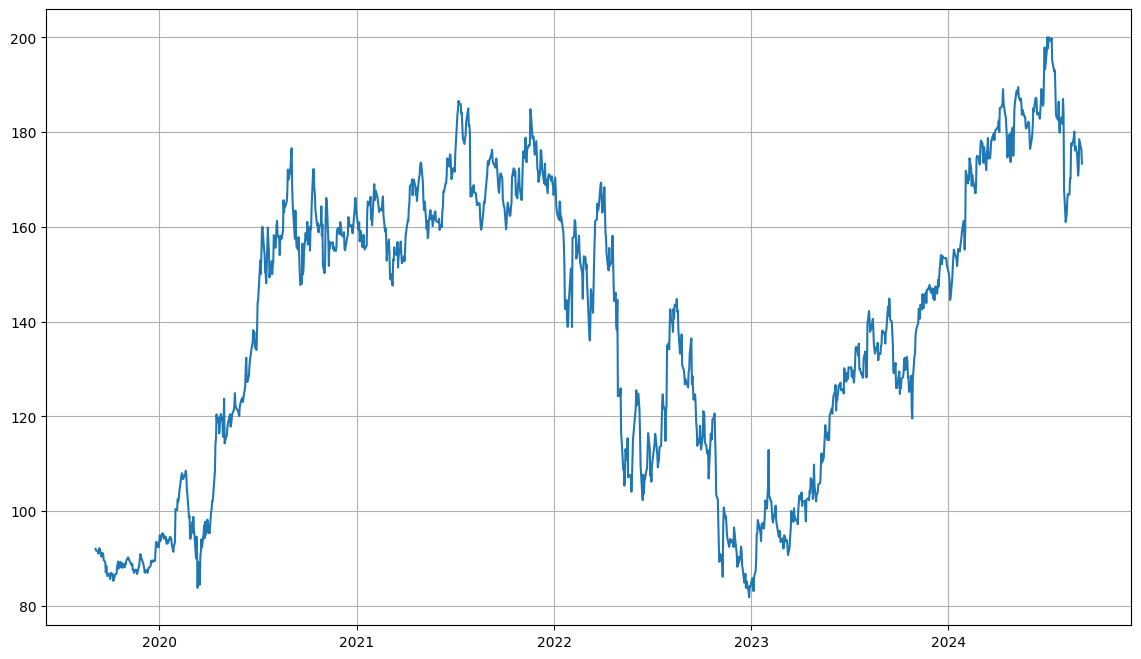

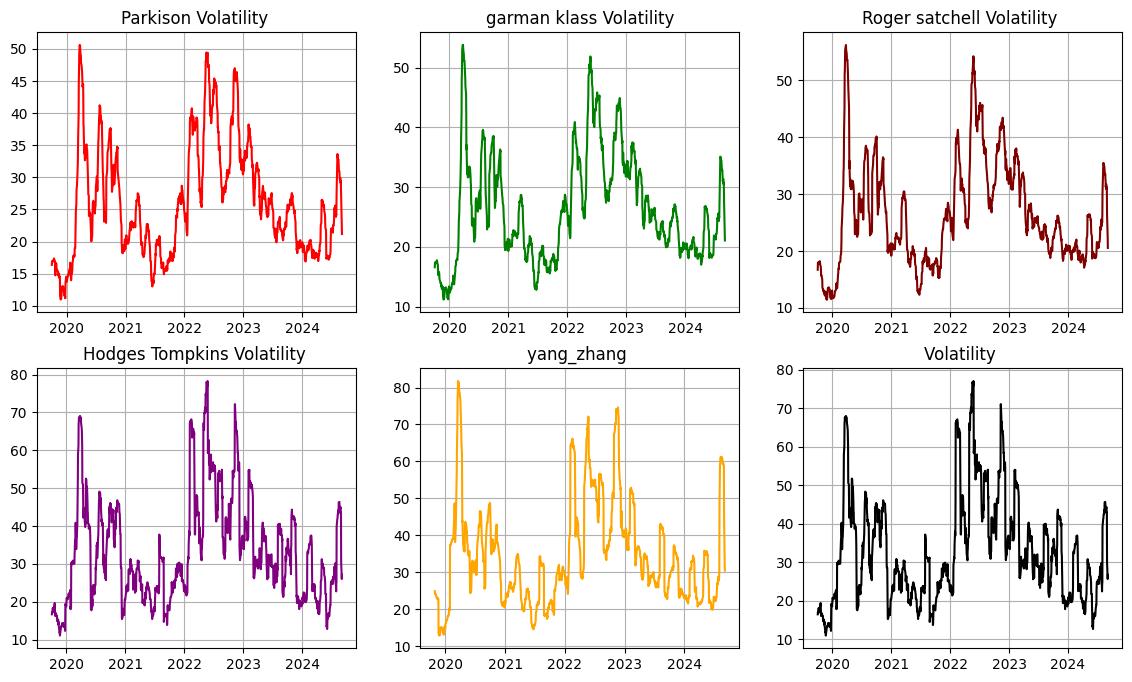

In [24]:

plt.figure(figsize=(14,8))
plt.plot(df['Close'])
plt.grid()

fig, axs = plt.subplots(2,3, figsize = (14,8))
axs[0,0].plot( parkison_vol(df)*100, color = 'red' )
axs[0,0].set_title('Parkison Volatility ')
axs[0,0].grid()

axs[0,1].plot(garman_klass(df)*100, color = 'green')
axs[0,1].set_title('garman klass Volatility')
axs[0,1].grid()

axs[0,2].plot( rogers_satchell(df)*100, color = 'maroon')
axs[0,2].set_title('Roger satchell Volatility ')
axs[0,2].grid()

axs[1,0].plot( hodges_tompkins(df)*100,  color = 'purple')
axs[1,0].set_title('Hodges Tompkins Volatility ')
axs[1,0].grid()

axs[1,1].plot(  yang_zhang(df)*100,  color = 'orange')
axs[1,1].set_title('yang_zhang ')
axs[1,1].grid()

axs[1,2].plot( std_dev(df)*100, color = 'black')
axs[1,2].set_title('Volatility ')
axs[1,2].grid()
plt.show()

In [30]:
print( (parkison_vol(df,43)*100)[-1])
print( (garman_klass(df,43)*100)[-1])
print( (rogers_satchell(df,43)*100)[-1])
print( (hodges_tompkins(df,43)*100)[-1])
print( (yang_zhang(df,43)*100)[-1])
print( (std_dev(df,43)*100)[-1])

26.79728378406776
27.69933246431981
27.84972922330575
36.12697520160249
45.01034097612102
34.86348243953469


/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_37434/1832810864.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( (parkison_vol(df,43)*100)[-1])
/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_37434/1832810864.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( (garman_klass(df,43)*100)[-1])
/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_37434/1832810864.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position